In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('glass.data', delimiter=",", names= ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Be', 'Fe', 'Type of glass'])
print(data.head())





   Id       RI     Na    Mg    Al     Si     K    Ca   Be   Fe  Type of glass
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1


In [14]:
## Preprocessing: Understanding the data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Be             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None


In [19]:
## Preprocessing : Dropping rows with missing values
#checking for null values
dropped_rows = data[data.isnull().any(axis=1)]
print(dropped_rows)

#checking for duplicates
duplicates = data[data.duplicated(keep='first')]
print(duplicates)
data.dropna(inplace=True)

#no duplicates or missing values 

Empty DataFrame
Columns: [Id, RI, Na, Mg, Al, Si, K, Ca, Be, Fe, Type of glass]
Index: []


In [39]:
## Preprocessing: Stadardising the data - centre the data
#subtracting mean from values in each column except Id and Type of glass columns 
centred_data = data[data.columns[1:-1]].apply(lambda x : x-x.mean())
typeOfGlass = pd.DataFrame(data['Type of glass'])
centred_data = pd.concat([centred_data, typeOfGlass], axis=1)
ID = pd.DataFrame(data['Id'])
centred_data = pd.concat([centred_data, ID], axis =1)
print(centred_data.mean())
print(centred_data.head())

RI              -8.715770e-17
Na               1.792958e-15
Mg              -2.656235e-16
Al              -1.660147e-16
Si               7.304645e-16
K                2.905257e-17
Ca              -4.814425e-16
Be               0.000000e+00
Fe              -7.781937e-18
Type of glass    2.780374e+00
Id               1.075000e+02
dtype: float64
         RI       Na        Mg        Al        Si         K        Ca  \
0  0.002645  0.23215  1.805467 -0.344907 -0.870935 -0.437056 -0.206963   
1 -0.000755  0.48215  0.915467 -0.084907  0.079065 -0.017056 -1.126963   
2 -0.002185  0.12215  0.865467  0.095093  0.339065 -0.107056 -1.176963   
3 -0.000705 -0.19785  1.005467 -0.154907 -0.040935  0.072944 -0.736963   
4 -0.000945 -0.13785  0.935467 -0.204907  0.429065  0.052944 -0.886963   

         Be        Fe  Type of glass  Id  
0 -0.175047 -0.057009              1   1  
1 -0.175047 -0.057009              1   2  
2 -0.175047 -0.057009              1   3  
3 -0.175047 -0.057009              1  

Text(0.5, 1.0, 'Histogram of glass type distribution')

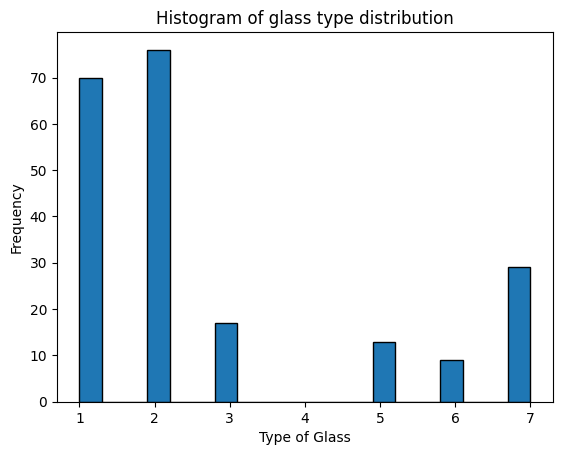

In [50]:
#print(centred_data.describe())

plt.hist(centred_data['Type of glass'], bins= 20, edgecolor = 'black')
plt.xlabel('Type of Glass')
plt.ylabel('Frequency')
plt.title('Histogram of glass type distribution')


In [158]:

#centred_data = centred_data.drop(columns='ID')
scaler = StandardScaler()
centred_data = scaler.fit_transform(centred_data)
#print(centred_data.head)

In [160]:
#Transposing the dataset

dataT = centred_data.T
#print(dataT.head)

In [161]:
#Covariance matrix
#data2 = pd.read_csv('glass.data', delimiter=",")
#centred_data2 = data2[data2.columns[1:-1]].apply(lambda x : x-x.mean())
cov_matrix = 1/214*(np.dot(dataT,centred_data))
print(cov_matrix)

[[ 1.00000000e+00 -1.91885379e-01 -1.22274039e-01 -4.07326034e-01
  -5.42052200e-01 -2.89832711e-01  8.10402696e-01 -3.86018912e-04
   1.43009609e-01 -1.64237215e-01]
 [-1.91885379e-01  1.00000000e+00 -2.73731961e-01  1.56793667e-01
  -6.98088065e-02 -2.66086504e-01 -2.75442486e-01  3.26602879e-01
  -2.41346411e-01  5.02898042e-01]
 [-1.22274039e-01 -2.73731961e-01  1.00000000e+00 -4.81798509e-01
  -1.65926723e-01  5.39566728e-03 -4.43750026e-01 -4.92262118e-01
   8.30595289e-02 -7.44992888e-01]
 [-4.07326034e-01  1.56793667e-01 -4.81798509e-01  1.00000000e+00
  -5.52372042e-03  3.25958446e-01 -2.59592010e-01  4.79403902e-01
  -7.44021509e-02  5.98829208e-01]
 [-5.42052200e-01 -6.98088065e-02 -1.65926723e-01 -5.52372042e-03
   1.00000000e+00 -1.93330854e-01 -2.08732154e-01 -1.02151310e-01
  -9.42007305e-02  1.51565258e-01]
 [-2.89832711e-01 -2.66086504e-01  5.39566728e-03  3.25958446e-01
  -1.93330854e-01  1.00000000e+00 -3.17836155e-01 -4.26180594e-02
  -7.71904912e-03 -1.00544638e-02

In [163]:
cov_matrix2 = np.cov(centred_data, rowvar=False)
print(cov_matrix2)

[[ 1.00469484e+00 -1.92786249e-01 -1.22848096e-01 -4.09238363e-01
  -5.44597046e-01 -2.91193428e-01  8.14207404e-01 -3.87831208e-04
   1.43681016e-01 -1.65008281e-01]
 [-1.92786249e-01  1.00469484e+00 -2.75017087e-01  1.57529788e-01
  -7.01365474e-02 -2.67335737e-01 -2.76735643e-01  3.28136226e-01
  -2.42479493e-01  5.05259066e-01]
 [-1.22848096e-01 -2.75017087e-01  1.00469484e+00 -4.84060474e-01
  -1.66705721e-01  5.42099905e-03 -4.45833360e-01 -4.94573208e-01
   8.34494798e-02 -7.48490507e-01]
 [-4.09238363e-01  1.57529788e-01 -4.84060474e-01  1.00469484e+00
  -5.54965338e-03  3.27488767e-01 -2.60810752e-01  4.81654624e-01
  -7.47514567e-02  6.01640613e-01]
 [-5.44597046e-01 -7.01365474e-02 -1.66705721e-01 -5.54965338e-03
   1.00469484e+00 -1.94238511e-01 -2.09712117e-01 -1.02630894e-01
  -9.46429875e-02  1.52276832e-01]
 [-2.91193428e-01 -2.67335737e-01  5.42099905e-03  3.27488767e-01
  -1.94238511e-01  1.00469484e+00 -3.19328343e-01 -4.28181441e-02
  -7.75528879e-03 -1.01016678e-02

In [164]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix2)
print('Eigenvalues:')
print(eigenvalues)
print('Eigenvectors')
print(eigenvectors)

Eigenvalues:
[3.06994294e+00 2.30209539e+00 1.41604105e+00 1.17180145e+00
 9.18376172e-01 5.49992529e-01 3.71169347e-01 1.83531870e-01
 1.61534547e-03 6.23822552e-02]
Eigenvectors
[[-2.55322493e-01  5.57990313e-01  9.21122120e-02 -1.44162055e-01
  -7.43335671e-02  9.32507113e-02 -8.86906662e-02 -1.57562046e-01
  -2.54519293e-02 -7.39343675e-01]
 [ 3.23838349e-01  3.97932800e-02 -3.49973608e-01 -5.24733387e-01
   1.54032465e-01 -5.02174254e-01 -1.26298068e-01  2.84795484e-01
   3.12605281e-01 -1.58214576e-01]
 [-3.87968015e-01 -3.80947241e-01 -2.50059531e-02 -3.29630864e-01
   1.17903459e-01  2.04740671e-01  1.80224300e-01 -4.16539925e-01
   5.76459169e-01 -3.10928479e-02]
 [ 4.42662921e-01 -6.07674893e-02  3.58029831e-01  1.06455896e-01
   1.79819491e-02  5.44316899e-02  7.10375870e-01  1.65829179e-01
   1.92869971e-01 -2.97019282e-01]
 [ 1.22202175e-01 -2.39827307e-01 -4.73860024e-01  6.36660969e-01
   1.18984418e-02  1.10903123e-01 -2.13363872e-01  3.75872028e-02
   2.98465218e-01 -3

In [165]:
##variance explained
sumOfEigenValues = sum(eigenvalues)
variance_explained =[(i/sumOfEigenValues) for i in sorted(eigenvalues, reverse=True)]
print('Variance explained ' , variance_explained)


Variance explained  [0.30555974154572335, 0.22913379394975145, 0.14094240339448558, 0.11663257433690825, 0.09140846949352636, 0.05474224706698415, 0.03694349109131829, 0.018267424478168818, 0.0062090749301175, 0.00016077971301621774]


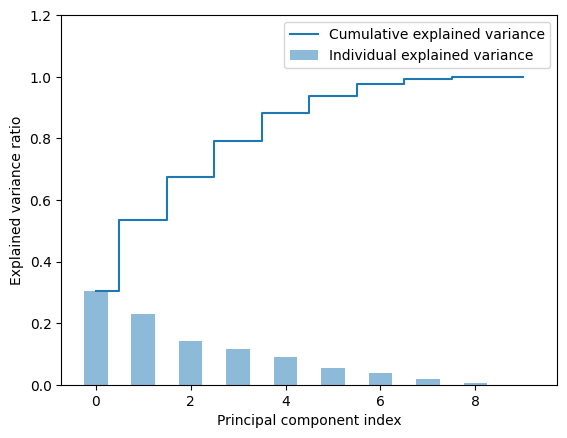

In [166]:
cum_sum_exp = np.cumsum(variance_explained)
plt.bar(range(0,len(variance_explained)), variance_explained, alpha=0.5, align='center', width = 0.5, label='Individual explained variance')
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid', label='Cumulative explained variance', linestyle='-')
#plt.plot(range(0, len(cum_sum_exp)), cum_sum_exp, label='Cumulative explained variance', linestyle='-')
plt.ylabel('Explained variance ratio')
plt.ylim(0,1.2)
#plt.xlim(0,13)
plt.xlabel('Principal component index')
plt.legend(loc='best')
#plt.tight_layout()
plt.show()

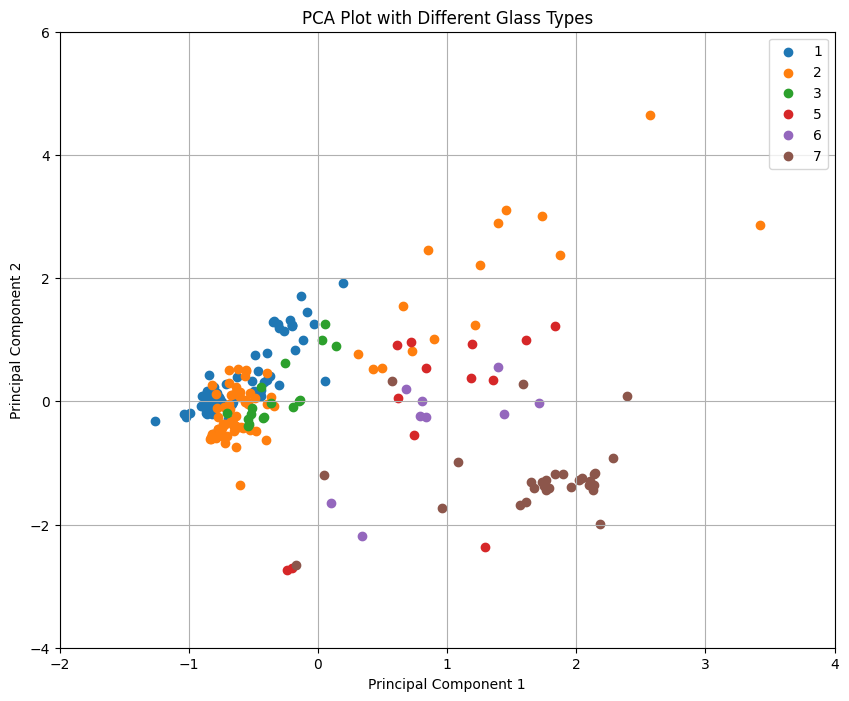

In [187]:
##Visualising the data using the first 2 principal components 
from sklearn.preprocessing import StandardScaler

# Create reduced dataset with just first 2 principal components 
reduced_data = centred_data.dot(eigenvectors[:,:2])
#this line is not needed

#scaling the reduced dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reduced_data)
#calc covariance matrix
cov_matrix3 = np.cov(scaled_data, rowvar=False)

#  Eigen Decomposition
eigenvalues1, eigenvectors1 = np.linalg.eig(cov_matrix3)
top_eigenvectors = eigenvectors1[:,:2]
pc_scores = np.dot(scaled_data, top_eigenvectors)
#  Plot the PCA Graph with Colors for Glass Types
plt.figure(figsize=(10, 8))
for glass_type in data['Type of glass'].unique():
    indices = data['Type of glass'] == glass_type
    plt.scatter(pc_scores[indices, 0], pc_scores[indices, 1], label=glass_type)



plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(-2,4)
plt.ylim(-4,6)
plt.title('PCA Plot with Different Glass Types')

plt.grid()
plt.legend()
plt.show()

In [197]:
import matplotlib.pyplot as plt
pc_scores = np.dot(scaled_data, eigenvectors1)
# Assuming 'pc_scores' is a DataFrame with principal component scores and 'data' contains glass types
plt.figure(figsize=(8, 6))

# Iterate over unique glass types and plot data points with different colors
for glass_type in data['Type of glass'].unique():
    indices = data['Type of glass'] == glass_type
    plt.scatter(pc_scores[indices, 2], pc_scores[indices,3], label=glass_type)

plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA Plot of Principal Components 3 and 4 by Glass Type')
plt.legend()
plt.grid()
plt.show()


IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 800x600 with 0 Axes>

In [155]:
#printing the correlations between original features and each component in a PCA analysis
#This loop iterates through each eigenvector (principal component) and its corresponding index i.
for i, eigenvector in enumerate(eigenvectors):
    print(f"Principal Component {i + 1} - Feature Correlations:")
    #iterates through the elements of the eigenvector, which represent the coefficients (loadings) of the original features for the corresponding principal component.
    for j, value in enumerate(eigenvector):
        feature_name = centred_data.columns[j] 
        #prints the name of the feature along with the correlation (loading) value between the feature and the current principal component. 
        print(f"{feature_name}: {value:.3f}")
    print()

Principal Component 1 - Feature Correlations:
RI: 0.000
Na: 0.002
Mg: -0.002
Al: -0.000
Si: 0.001
K: -0.001
Ca: 0.002
Be: -1.000
Fe: -0.004
Type of glass: -0.000

Principal Component 2 - Feature Correlations:
RI: -0.158
Na: -0.200
Mg: -0.543
Al: 0.350
Si: -0.534
K: 0.312
Ca: -0.037
Be: 0.001
Fe: -0.364
Type of glass: -0.041

Principal Component 3 - Feature Correlations:
RI: 0.509
Na: -0.322
Mg: -0.299
Al: 0.098
Si: 0.626
K: 0.049
Ca: 0.009
Be: 0.002
Fe: -0.373
Type of glass: -0.065

Principal Component 4 - Feature Correlations:
RI: -0.118
Na: -0.100
Mg: 0.099
Al: -0.271
Si: -0.063
K: -0.303
Ca: -0.804
Be: -0.000
Fe: -0.378
Type of glass: -0.081

Principal Component 5 - Feature Correlations:
RI: -0.048
Na: -0.092
Mg: 0.714
Al: 0.568
Si: 0.006
K: 0.095
Ca: 0.061
Be: 0.000
Fe: -0.375
Type of glass: -0.057

Principal Component 6 - Feature Correlations:
RI: 0.010
Na: -0.110
Mg: 0.235
Al: -0.678
Si: -0.121
K: 0.482
Ca: 0.281
Be: 0.001
Fe: -0.379
Type of glass: -0.057

Principal Component 7 -